In [88]:
import pandas as pd
import itertools
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from wordcloud import WordCloud
import re
from urllib.parse import urlparse
from googlesearch import search
from tld import get_tld
import os.path
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [2]:
df=pd.read_csv('malicious_phish.csv')
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [3]:
df.shape

(651191, 2)

In [4]:
df['type'].value_counts()

type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64

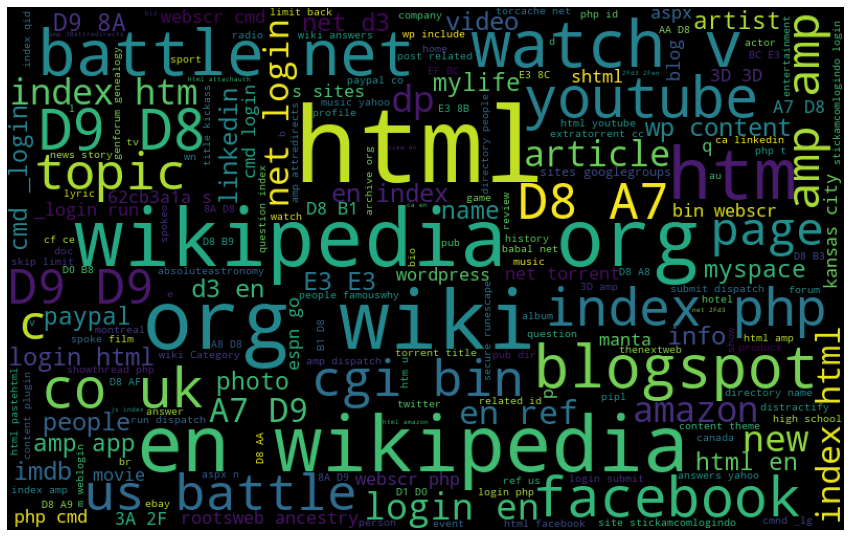

In [5]:
plt.figure(figsize=(15,19))
ben=' '.join([text for text in df['url'][df['type']=='benign']])
wordcloud_be=WordCloud(width=800,height=500,random_state=101,max_font_size=100).generate(ben)
plt.imshow(wordcloud_be)
plt.axis('off')
plt.show()

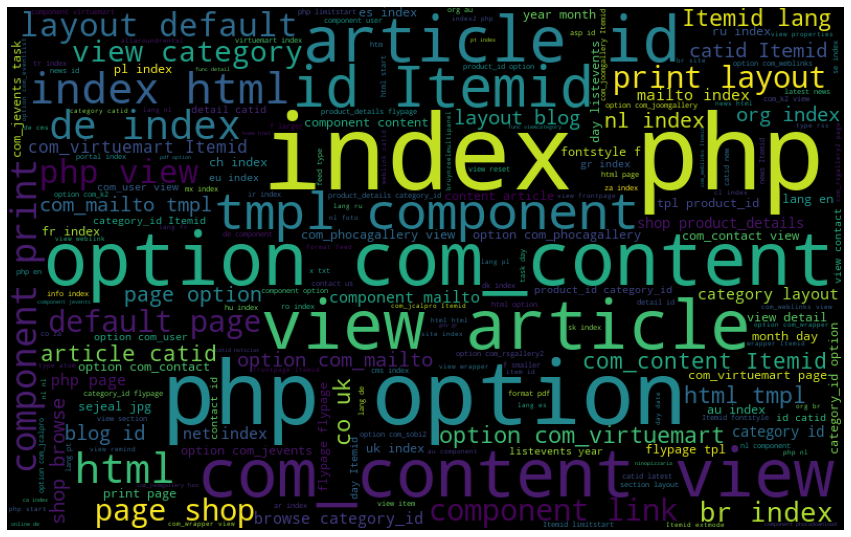

In [6]:
plt.figure(figsize=(15,19))
defa=' '.join(df['url'][df['type']=='defacement'].tolist())
wordcloud_defa=WordCloud(width=800,height=500,random_state=101,max_font_size=100).generate(defa)
plt.imshow(wordcloud_defa)
plt.axis('off')
plt.show()

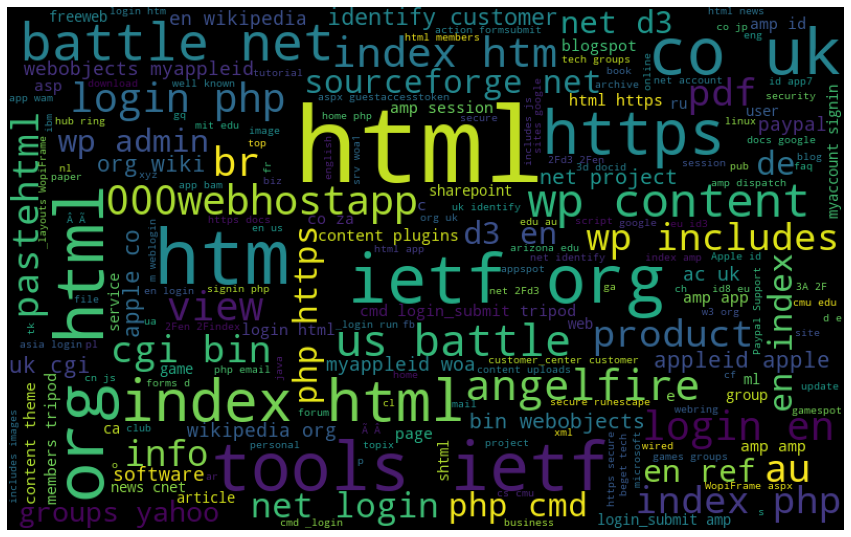

In [7]:
plt.figure(figsize=(15,19))
phi=' '.join([text for text in df['url'][df['type']=='phishing']])
wordcloud_phi=WordCloud(width=800,height=500,random_state=101,max_font_size=100).generate(phi)
plt.imshow(wordcloud_phi)
plt.axis('off')
plt.show()

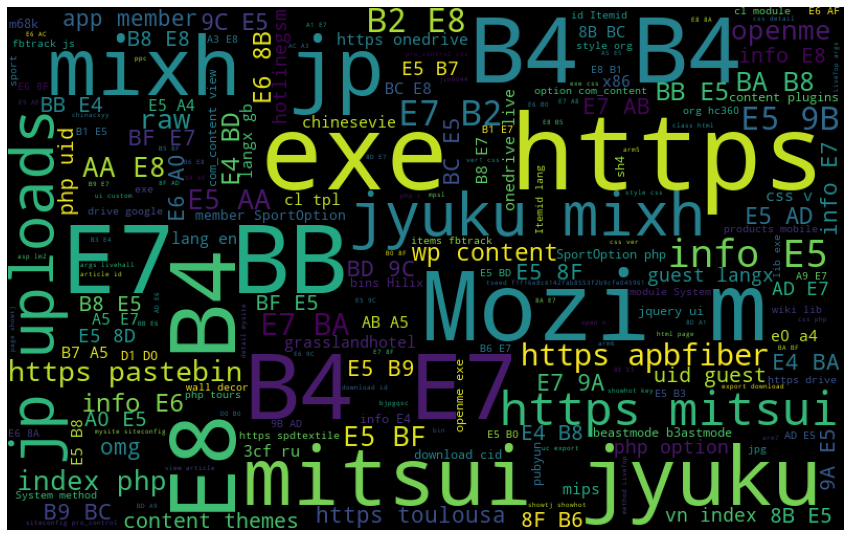

In [8]:
plt.figure(figsize=(15,19))
mal=' '.join(df['url'][df['type']=='malware'].tolist())
wordcloud_mal=WordCloud(width=800,height=500,random_state=101,max_font_size=100).generate(mal)
plt.imshow(wordcloud_mal)
plt.axis('off')
plt.show()

In [9]:
# Use of IP or not in domain
def having_ip_address(url):
    match=re.search(
    '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
    '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|' #IPv4
    '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
    '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}',url) # IPv6
    if match:
        return 1
    else:
        return 0
df['use_of_ip']=df['url'].apply(lambda i:having_ip_address(i))

In [10]:
def abnormal_url(url):
    hostname=urlparse(url).hostname
    hostname=str(hostname)
    match=re.search(hostname,url)
    if match:
        return 1
    else:
        return 0
df['abnormal_url']=df['url'].apply(lambda i:abnormal_url(i))

In [11]:
def google_index(url):
    site=search(url,5)
    return 1 if site else 0
df['google_index']=df['url'].apply(lambda i:google_index(i))

In [12]:
def count_dot(url):
    count_dot=url.count('.')
    return count_dot
df['count.']=df['url'].apply(lambda i:count_dot(i))

In [13]:
df.head()

,url,type,use_of_ip,abnormal_url,google_index,count.
0,br-icloud.com.br,phishing,0,0,1,2
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,1,2
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,1,2
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,1,3
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,1,2


In [14]:
def count_www(url):
    return url.count('www')
df['count_www']=df['url'].apply(lambda i:count_www(i))

In [15]:
def count_atrate(url):
    return url.count('@')
df['count@']=df['url'].apply(lambda i:count_atrate(i))

In [16]:
def no_of_dir(url):
    urldir=urlparse(url).path
    return urldir.count('/')
df['count_dir']=df['url'].apply(lambda i:no_of_dir(i))

In [17]:
def no_of_embed(url):
    urldir=urlparse(url).path
    return urldir.count('//')
df['count_embed_domain']=df['url'].apply(lambda i:no_of_embed(i))

In [18]:
def shortening_service(url):
    match=re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                   'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                   'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                   'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                   'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im'
                   'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                   'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tewwz\.me|v\.gd|'
                   'tr\.im|link\.zip\.net',url)
    if match:
        return 1
    else:
        return 0
df['short_url']=df['url'].apply(lambda i:shortening_service(i))

In [19]:
def http_count(url):
    return url.count('http')
df['count_http']=df['url'].apply(lambda i:http_count(i))

In [20]:
def https_count(url):
    return url.count('https')
df['count_https']=df['url'].apply(lambda i:https_count(i))

In [21]:
def count_per(url):
    return url.count('%')
df['count%']=df['url'].apply(lambda i:count_per(i))

In [22]:
def count_quest(url):
    return url.count('?')
df['count?']=df['url'].apply(lambda i:count_quest(i))

In [23]:
def count_hyphen(url):
    return url.count('-')
df['count-']=df['url'].apply(lambda i:count_hyphen(i))

In [24]:
def count_equal(url):
    return url.count('=')
df['count=']=df['url'].apply(lambda i:count_equal(i))

In [25]:
def url_length(url):
    return len(str(url))
df['url_length']=df['url'].apply(lambda i:url_length(i))

In [26]:
def hostname_length(url):
    return len(urlparse(url).netloc)
df['hostname_length']=df['url'].apply(lambda i:hostname_length(i))

In [27]:
df.head()

,url,type,use_of_ip,abnormal_url,google_index,count.,count_www,count@,count_dir,count_embed_domain,short_url,count_http,count_https,count%,count?,count-,count=,url_length,hostname_length
0,br-icloud.com.br,phishing,0,0,1,2,0,0,0,0,0,0,0,0,0,1,0,16,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,1,2,0,0,2,0,0,0,0,0,0,0,0,35,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,1,2,0,0,3,0,0,0,0,0,0,0,0,31,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,1,3,1,0,1,0,0,1,0,0,1,1,4,88,21
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,1,2,0,0,1,0,0,1,0,0,1,1,3,235,23


In [28]:
def suspicious_words(url):
    match=re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',url)
    if match:
        return 1
    else:
        return 0
df['sus_url']=df['url'].apply(lambda i:suspicious_words(i))

In [29]:
def digit_count(url):
    digits=0
    for i in url:
        if i.isnumeric():
            digits+=1
        return digits
df['count_digits']=df['url'].apply(lambda i:digit_count(i))

In [30]:
def letter_count(url):
    letters=0
    for i in url:
        if i.isalpha():
            letters+=1
        return letters
df['count_letters']=df['url'].apply(lambda i:letter_count(i))

In [31]:
df.head()

,url,type,use_of_ip,abnormal_url,google_index,count.,count_www,count@,count_dir,count_embed_domain,...,count_https,count%,count?,count-,count=,url_length,hostname_length,sus_url,count_digits,count_letters
0,br-icloud.com.br,phishing,0,0,1,2,0,0,0,0,...,0,0,0,1,0,16,0,0,0,1
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,1,2,0,0,2,0,...,0,0,0,0,0,35,0,0,0,1
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,1,2,0,0,3,0,...,0,0,0,0,0,31,0,0,0,1
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,1,3,1,0,1,0,...,0,0,1,1,4,88,21,0,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,1,2,0,0,1,0,...,0,0,1,1,3,235,23,0,0,1


In [32]:
def fd_length(url):
    urlpath=urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0
df['fd_length']=df['url'].apply(lambda i:fd_length(i))

In [33]:
df['tld']=df['url'].apply(lambda i:get_tld(i,fail_silently=True))

In [34]:
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1
df['tld_length']=df['tld'].apply(lambda i:tld_length(i))

In [35]:
df=df.drop('tld',axis=1)

In [36]:
df.columns

Index(['url', 'type', 'use_of_ip', 'abnormal_url', 'google_index', 'count.',
       'count_www', 'count@', 'count_dir', 'count_embed_domain', 'short_url',
       'count_http', 'count_https', 'count%', 'count?', 'count-', 'count=',
       'url_length', 'hostname_length', 'sus_url', 'count_digits',
       'count_letters', 'fd_length', 'tld_length'],
      dtype='object')

In [37]:
df['type'].value_counts()

type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64

In [38]:
for i in df.columns:
    print(i,df[i].unique())

url ['br-icloud.com.br' 'mp3raid.com/music/krizz_kaliko.html'
 'bopsecrets.org/rexroth/cr/1.htm' ...
 'www.gamespot.com/xbox360/action/deadspace/'
 'en.wikipedia.org/wiki/Dead_Space_(video_game)'
 'www.angelfire.com/goth/devilmaycrytonite/']
type ['phishing' 'benign' 'defacement' 'malware']
use_of_ip [0 1]
abnormal_url [0 1]
google_index [1]
count. [ 2  3  1  4  6  7 11  8  5 17 10  9 12 13 16 14 15 18 21 19 22 20 23 27
 26 25 31 24 42 37  0 36 35 34 28]
count_www [0 1 2 4 3 5]
count@ [ 0  1  2  3  6  4 10]
count_dir [ 0  2  3  1  6  5  4  8  7 10  9 11 15 12 14 18 16 13 17 19 39 24 21 27
 28 25 22 20 23 32 34]
count_embed_domain [0 1 2]
short_url [0 1]
count_http [0 1 2 3 4 9 6 5]
count_https [0 1 3 2 4 5]
count% [  0   1   3  62  21  68  15   2  27   5   6  20   4  18  22  38   9  24
  11  39  35  37   8  10  29  58  30   7  98  42  63  77  84  50  13  33
  32  49  16  56  40  12  47  52  19  72  45  54  57  48  60  64  92  28
  23  59  96  34  14 201  86 106 114  76  66  36  65  26 

In [39]:
df.drop(columns='google_index',axis=1,inplace=True)

In [40]:
cols1=['use_of_ip', 'abnormal_url',
       'count_embed_domain', 'short_url',
       'sus_url', 'count_digits',
       'count_letters']

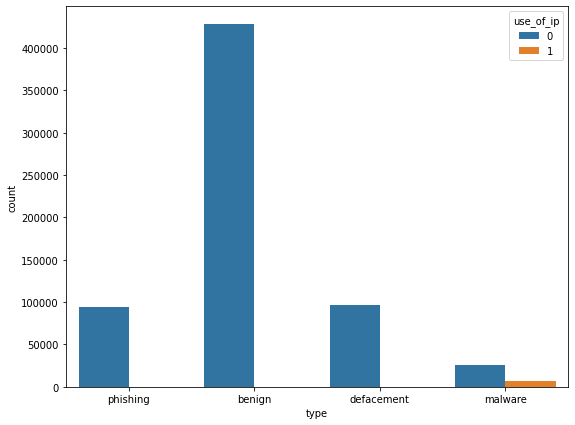

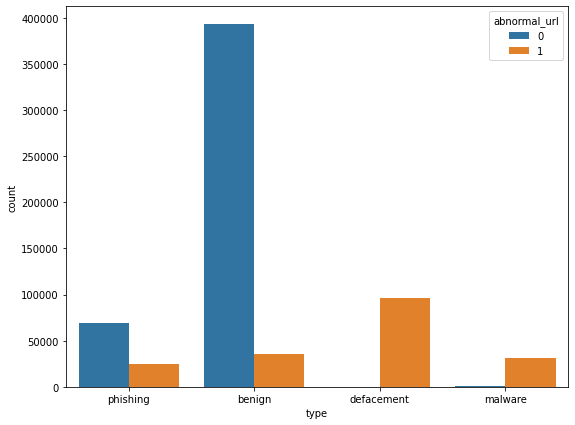

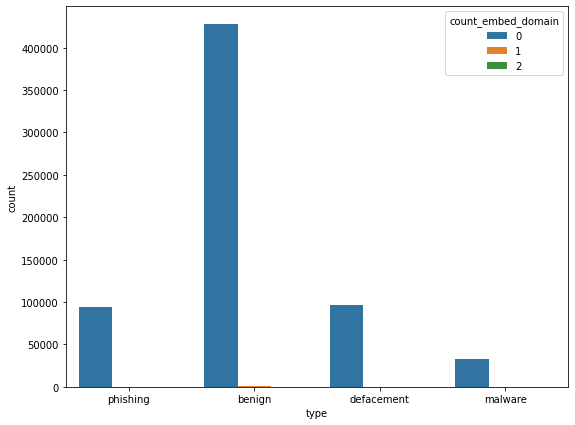

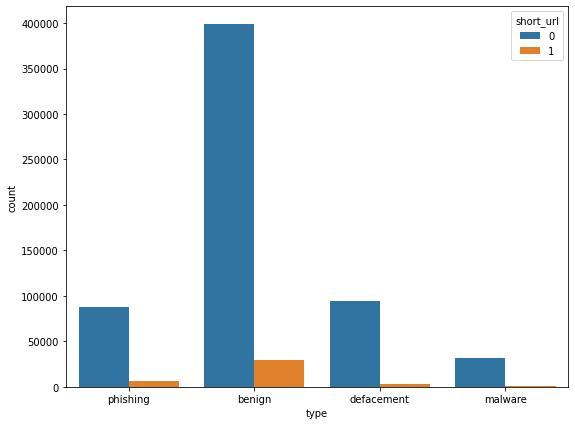

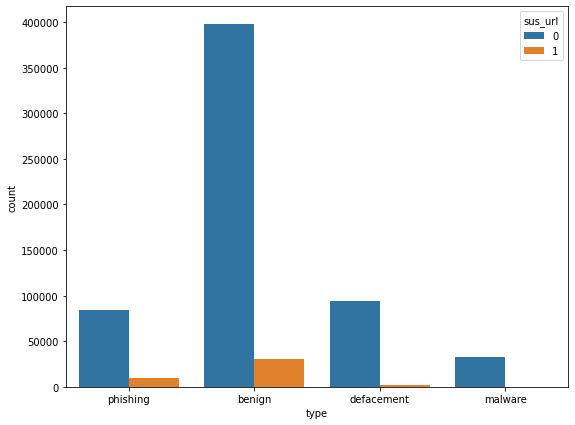

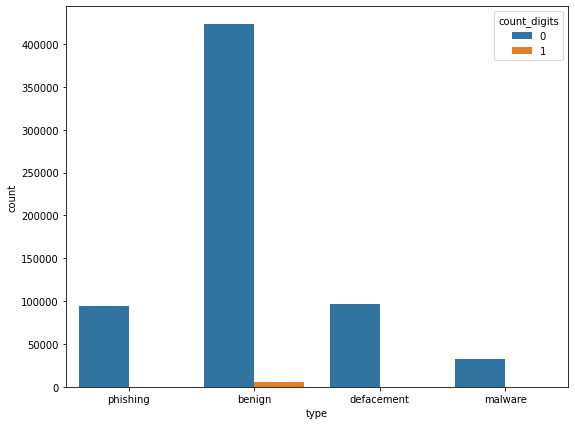

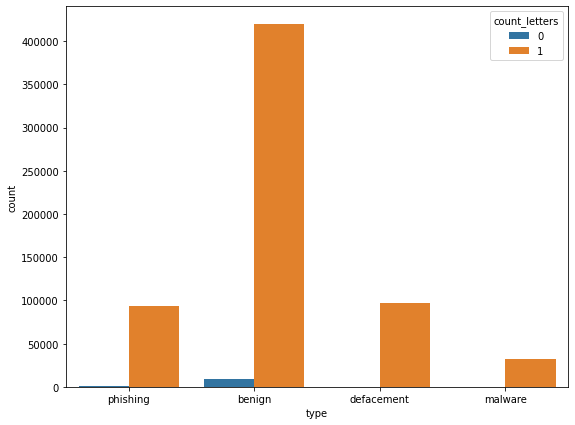

In [41]:
for i in cols1:
    plt.figure(figsize=(9,7))
    sns.countplot(data=df,x='type',hue=i)
    plt.show()

In [42]:
cols2=['count.','count_www','count@','count_dir','count_http','count_https','count%','count?','count-','count=','url_length',
      'hostname_length','fd_length','tld_length']

<Figure size 648x504 with 0 Axes>

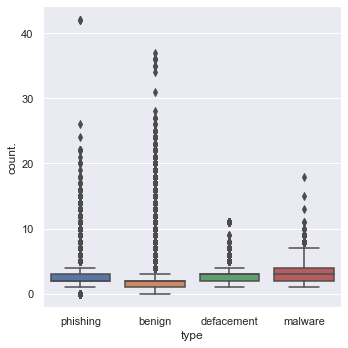

<Figure size 648x504 with 0 Axes>

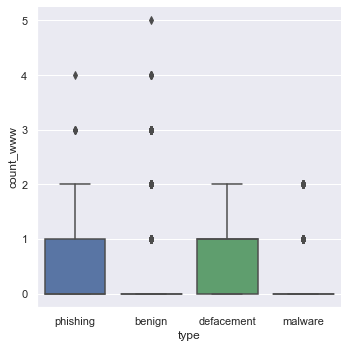

<Figure size 648x504 with 0 Axes>

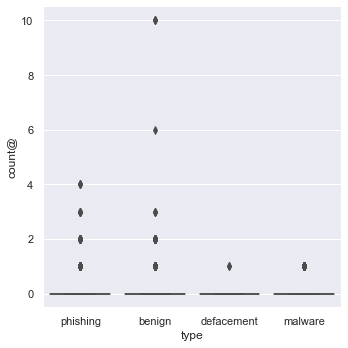

<Figure size 648x504 with 0 Axes>

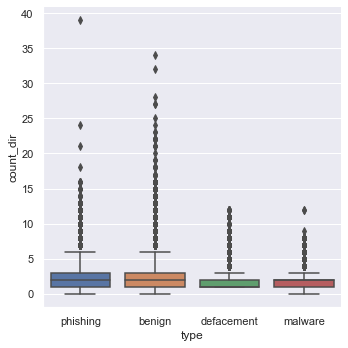

<Figure size 648x504 with 0 Axes>

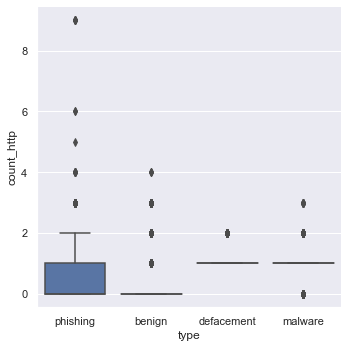

<Figure size 648x504 with 0 Axes>

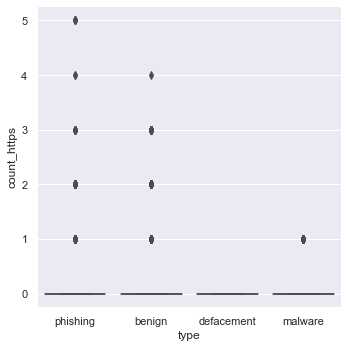

<Figure size 648x504 with 0 Axes>

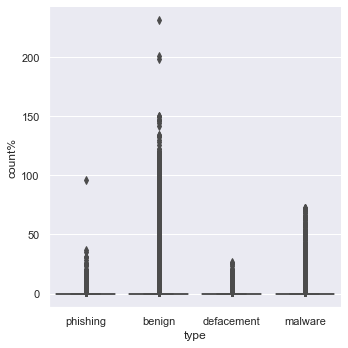

<Figure size 648x504 with 0 Axes>

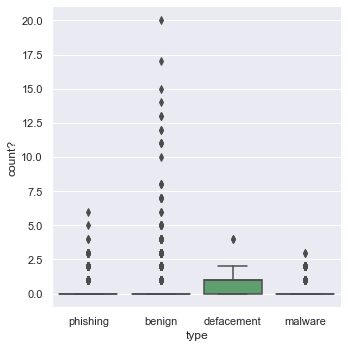

<Figure size 648x504 with 0 Axes>

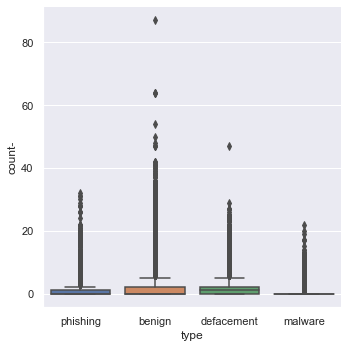

<Figure size 648x504 with 0 Axes>

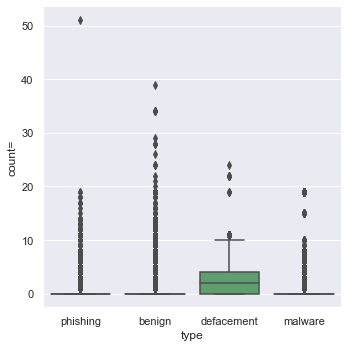

<Figure size 648x504 with 0 Axes>

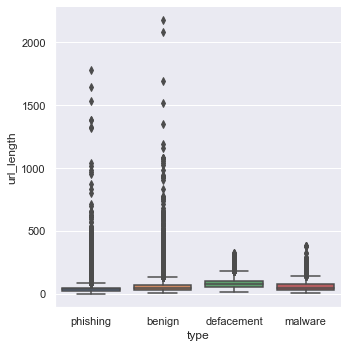

<Figure size 648x504 with 0 Axes>

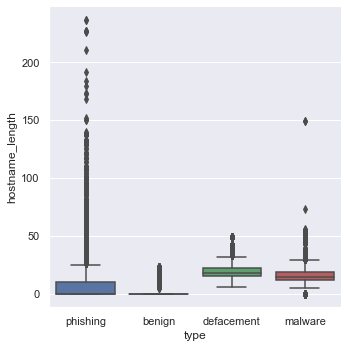

<Figure size 648x504 with 0 Axes>

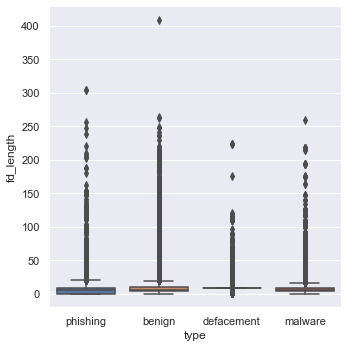

<Figure size 648x504 with 0 Axes>

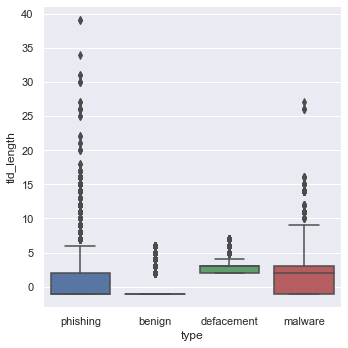

In [43]:
for i in cols2:
    plt.figure(figsize=(9,7))
    sns.set(style='darkgrid')
    sns.catplot(data=df,x='type',y=i,kind='box')
    plt.show()

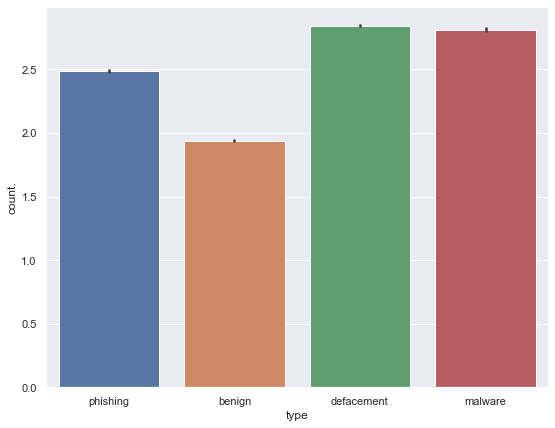

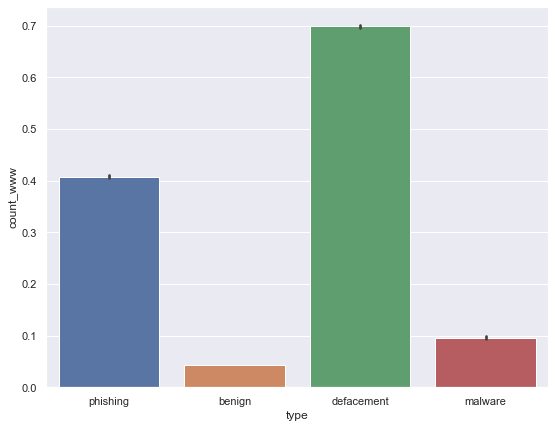

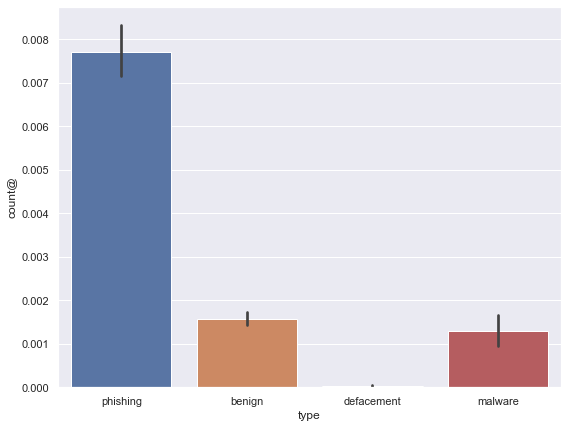

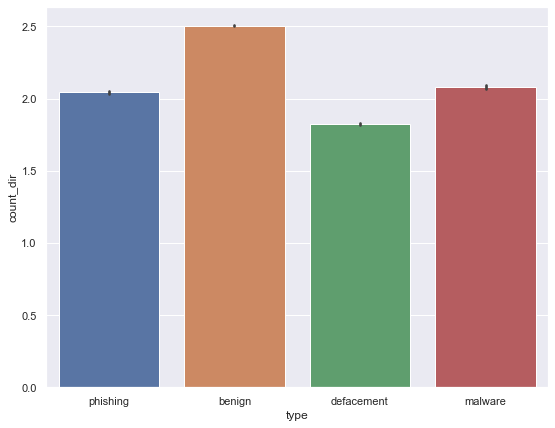

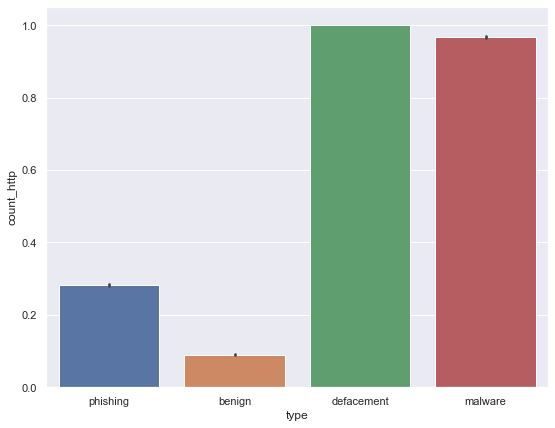

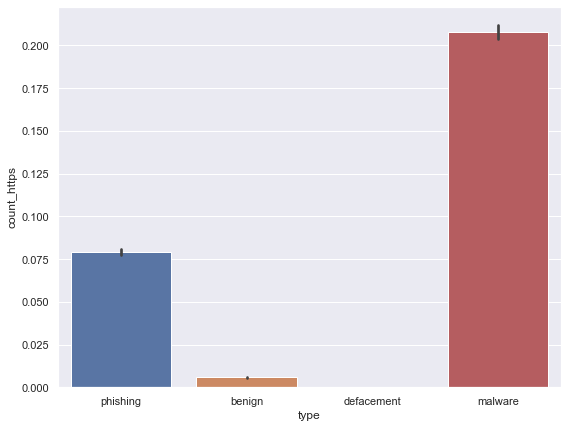

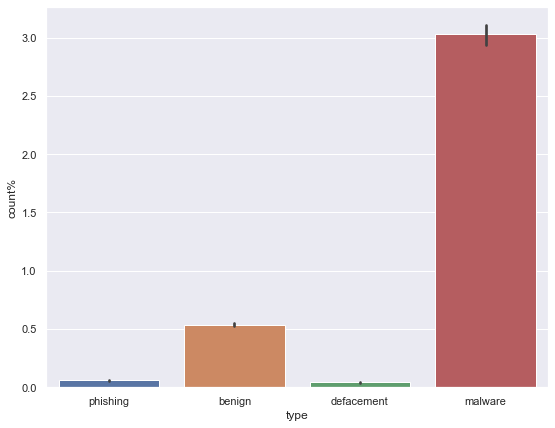

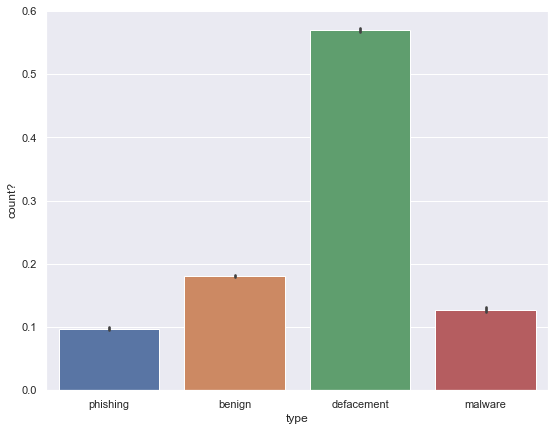

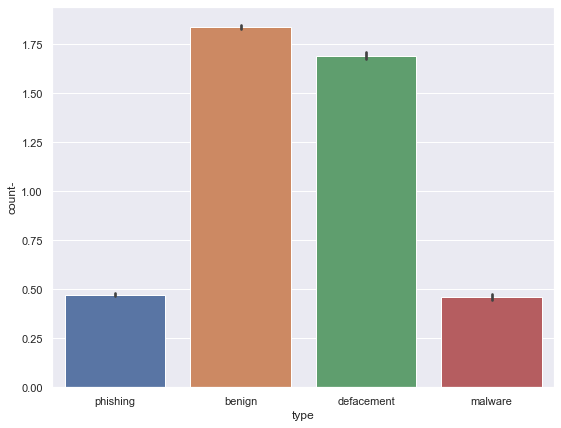

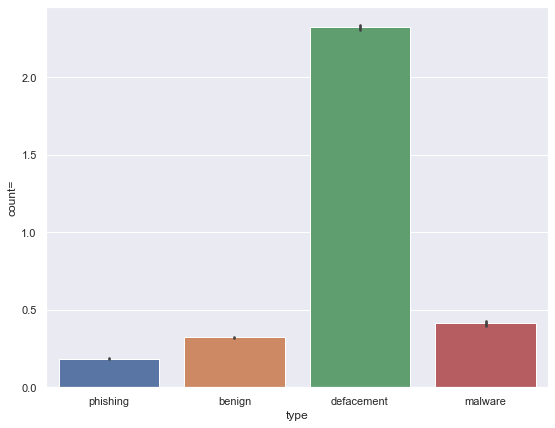

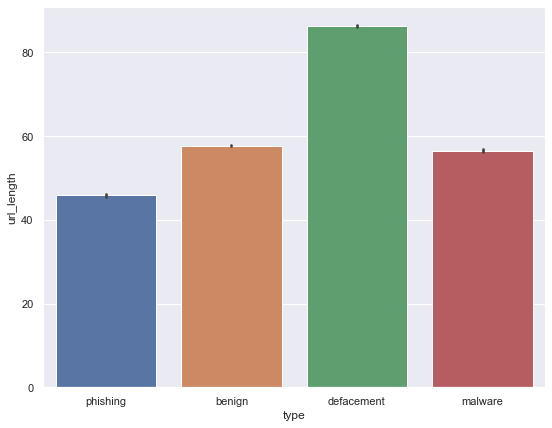

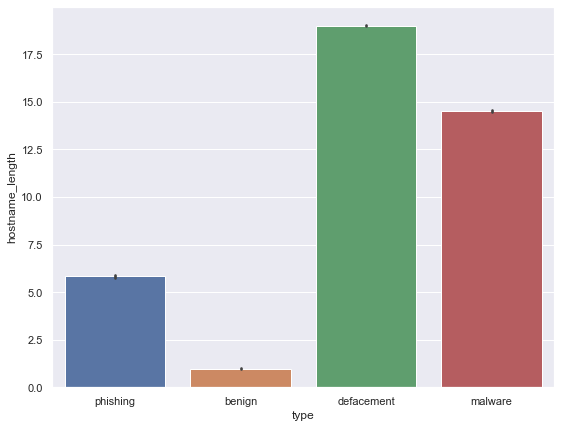

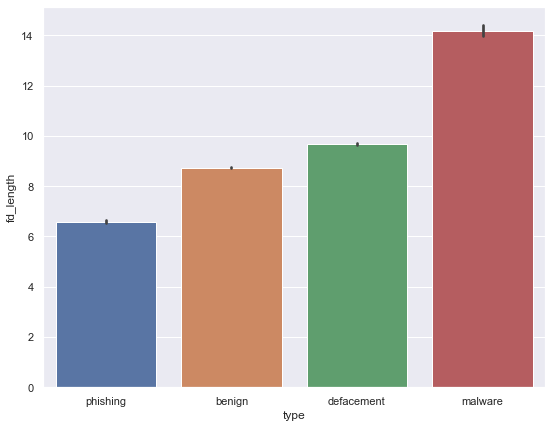

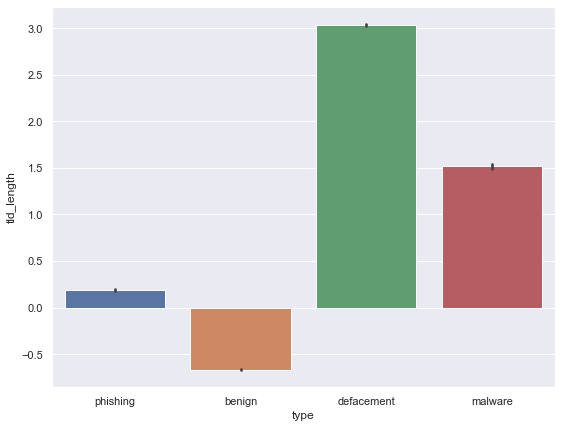

In [44]:
for i in cols2:
    plt.figure(figsize=(9,7))
    sns.barplot(data=df,x='type',y=i)
    plt.show()

In [45]:
df['type'].value_counts()

type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64

In [46]:
df_ben=df[df['type']=='benign']
df_defa=df[df['type']=='defacement']
df_phi=df[df['type']=='phishing']
df_mal=df[df['type']=='malware']

In [47]:
df_ben.shape

(428103, 23)

In [48]:
df_defa.shape

(96457, 23)

In [49]:
df_phi.shape

(94111, 23)

In [50]:
df_mal.shape

(32520, 23)

In [51]:
df_ben_n=df_ben.sample(df_mal.shape[0])
df_defa_n=df_defa.sample(df_mal.shape[0])
df_phi_n=df_phi.sample(df_mal.shape[0])

In [52]:
df_ben_n.shape

(32520, 23)

In [53]:
df_defa_n.shape

(32520, 23)

In [54]:
df_phi_n.shape

(32520, 23)

In [55]:
df_balanced=pd.concat([df_ben_n,df_defa_n,df_phi_n,df_mal])

In [56]:
df_balanced.shape

(130080, 23)

In [57]:
df_balanced['type'].value_counts()

type
benign        32520
defacement    32520
phishing      32520
malware       32520
Name: count, dtype: int64

In [58]:
df_balanced.head()

,url,type,use_of_ip,abnormal_url,count.,count_www,count@,count_dir,count_embed_domain,short_url,...,count?,count-,count=,url_length,hostname_length,sus_url,count_digits,count_letters,fd_length,tld_length
94567,biologicaldiversity.org/about/staff/,benign,0,0,1,0,0,3,0,0,...,0,0,0,36,0,0,0,1,5,-1
246153,kuathletics.com/blog/kansas-football/,benign,0,0,1,0,0,3,0,0,...,0,1,0,37,0,0,0,1,4,-1
558287,www.syscompsa.com/upload/billin7221.html,benign,0,0,3,1,0,2,0,0,...,0,0,0,40,0,0,0,1,6,-1
105148,arenafan.com/teams/?page=clubhouse&team=116,benign,0,0,1,0,0,2,0,0,...,1,0,2,43,0,0,0,1,5,-1
407481,ohr.psu.edu/,benign,0,0,2,0,0,1,0,0,...,0,0,0,12,0,0,0,1,0,-1


In [59]:
le=LabelEncoder()
df_balanced['type']=le.fit_transform(df_balanced['type'])

In [60]:
X=df_balanced.drop(columns=['type','url'],axis=1)
y=df_balanced['type']

In [61]:
X

,use_of_ip,abnormal_url,count.,count_www,count@,count_dir,count_embed_domain,short_url,count_http,count_https,...,count?,count-,count=,url_length,hostname_length,sus_url,count_digits,count_letters,fd_length,tld_length
94567,0,0,1,0,0,3,0,0,0,0,...,0,0,0,36,0,0,0,1,5,-1
246153,0,0,1,0,0,3,0,0,0,0,...,0,1,0,37,0,0,0,1,4,-1
558287,0,0,3,1,0,2,0,0,0,0,...,0,0,0,40,0,0,0,1,6,-1
105148,0,0,1,0,0,2,0,0,0,0,...,1,0,2,43,0,0,0,1,5,-1
407481,0,0,2,0,0,1,0,0,0,0,...,0,0,0,12,0,0,0,1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555181,0,1,4,0,0,1,0,0,1,0,...,0,0,0,34,20,0,0,1,6,-1
555182,0,1,4,0,0,1,0,0,1,0,...,0,0,0,34,20,0,0,1,6,-1
555183,0,1,4,0,0,1,0,0,1,0,...,0,0,0,35,21,0,0,1,6,-1
555184,0,1,4,0,0,1,0,0,1,0,...,0,0,0,32,18,0,0,1,6,-1


In [62]:
y

94567     0
246153    0
558287    0
105148    0
407481    0
         ..
555181    2
555182    2
555183    2
555184    2
555185    2
Name: type, Length: 130080, dtype: int32

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101,stratify=y,shuffle=True)

In [64]:
len(X_train)

104064

In [65]:
len(X_test)

26016

In [66]:
y_train.value_counts()

type
3    26016
1    26016
2    26016
0    26016
Name: count, dtype: int64

In [67]:
y_test.value_counts()

type
3    6504
0    6504
2    6504
1    6504
Name: count, dtype: int64

In [68]:
# Random Forest Classifier

In [69]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
print(classification_report(rf_pred,y_test,target_names=['benign','defacement','malware','phishing']))

              precision    recall  f1-score   support

      benign       0.94      0.93      0.93      6625
  defacement       0.99      0.97      0.98      6623
     malware       0.95      0.98      0.97      6316
    phishing       0.89      0.90      0.90      6452

    accuracy                           0.94     26016
   macro avg       0.94      0.94      0.94     26016
weighted avg       0.94      0.94      0.94     26016



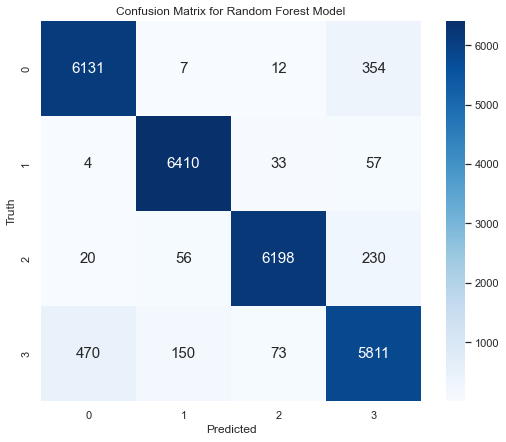

In [77]:
plt.figure(figsize=(9,7))
sns.heatmap(confusion_matrix(y_test,rf_pred),annot=True,square=True,cbar=True,annot_kws={'size':15},fmt='d',cmap='Blues')
plt.title('Confusion Matrix for Random Forest Model')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

<AxesSubplot:>

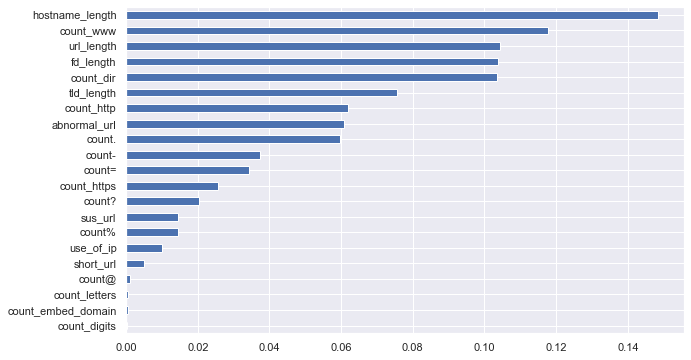

In [78]:
feat_importances_rf=pd.Series(rf.feature_importances_,index=X_train.columns)
feat_importances_rf.sort_values().plot(kind='barh',figsize=(10,6))

In [82]:
lg=LGBMClassifier(objective='multiclass',boosting_type='gbdt',n_jobs=5,random_state=5)
lg.fit(X_train,y_train)
lg_pred=lg.predict(X_test)
print(classification_report(lg_pred,y_test,target_names=['benign','defacement','malware','phishing']))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015056 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 104064, number of used features: 21
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
              precision    recall  f1-score   support

      benign       0.95      0.92      0.93      6758
  defacement       0.98      0.95      0.97      6693
     malware       0.94      0.97      0.95      6285
    phishing       0.87      0.90      0.89      6280

    accuracy                           0.94     26016
   macro avg       0.94      0.94      0.93     26016
weighted avg       0.94      0.94      0.94     260

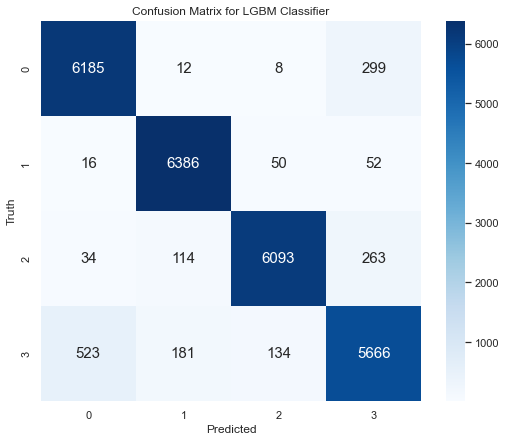

In [83]:
plt.figure(figsize=(9,7))
sns.heatmap(confusion_matrix(y_test,lg_pred),annot=True,square=True,cbar=True,annot_kws={'size':15},fmt='d',cmap='Blues')
plt.title('Confusion Matrix for LGBM Classifier')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

<AxesSubplot:>

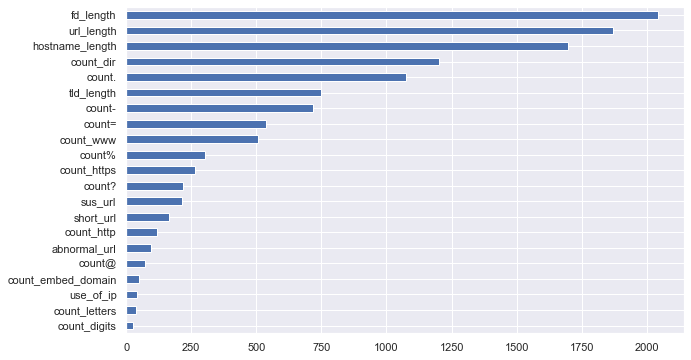

In [86]:
feat_importances_lg=pd.Series(lg.feature_importances_,index=X_train.columns)
feat_importances_lg.sort_values().plot(kind='barh',figsize=(10,6))

In [92]:
xg=XGBClassifier(max_depth=15)
xg.fit(X_train,y_train)
xg_pred=xg.predict(X_test)
print(classification_report(y_test,xg_pred,target_names=['benign','defacement','malware','phishing']))

              precision    recall  f1-score   support

      benign       0.93      0.95      0.94      6504
  defacement       0.97      0.98      0.98      6504
     malware       0.98      0.95      0.97      6504
    phishing       0.90      0.90      0.90      6504

    accuracy                           0.95     26016
   macro avg       0.95      0.95      0.95     26016
weighted avg       0.95      0.95      0.95     26016



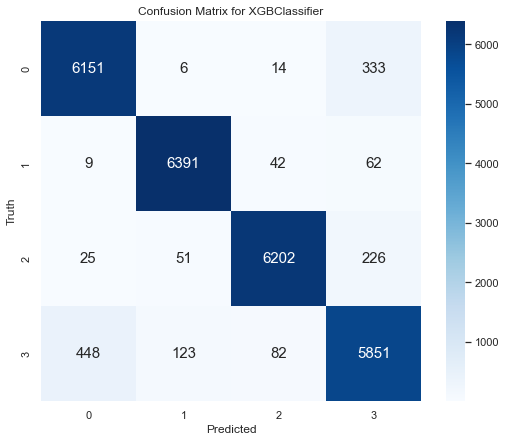

In [94]:
plt.figure(figsize=(9,7))
sns.heatmap(confusion_matrix(y_test,xg_pred),annot=True,square=True,cbar=True,annot_kws={'size':15},fmt='d',cmap='Blues')
plt.title('Confusion Matrix for XGBClassifier')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

<AxesSubplot:>

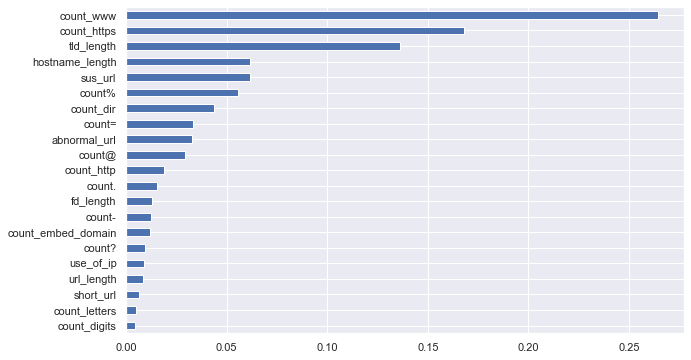

In [96]:
feat_importances_xg=pd.Series(xg.feature_importances_,index=X_train.columns)
feat_importances_xg.sort_values().plot(kind='barh',figsize=(10,6))